In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load the data
df = pd.read_csv('/content/Dataset_final2.csv')  # Replace with your file name
print("Data loaded successfully")
print("Shape of dataset:", df.shape)

Data loaded successfully
Shape of dataset: (5000, 13)


In [17]:
# Check the format of your dates
print("Sample of created_at values:")
print(df['created_at'].head())

Sample of created_at values:
0    Monday 09:30:00
1    Monday 09:32:00
2    Monday 09:34:00
3    Monday 09:36:00
4    Monday 09:38:00
Name: created_at, dtype: object


In [18]:
# Modified Block 3
# Extract hour, minute from the time string
df['hour'] = df['created_at'].str.split(':').str[0].str.split(' ').str[1].astype(int)
df['minute'] = df['created_at'].str.split(':').str[1].astype(int)

# Map weekday names to numbers (0 = Monday, 6 = Sunday)
weekday_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['day_of_week'] = df['created_at'].str.split(' ').str[0].map(weekday_map)

# Set a default month (since month information is not in your timestamps)
df['month'] = 1  # You can change this if you know the actual month

# Verify the conversion
print("\nDateTime processing completed")
print("\nSample of processed data:")
print(df[['created_at', 'hour', 'minute', 'day_of_week', 'month']].head())


DateTime processing completed

Sample of processed data:
        created_at  hour  minute  day_of_week  month
0  Monday 09:30:00     9      30            0      1
1  Monday 09:32:00     9      32            0      1
2  Monday 09:34:00     9      34            0      1
3  Monday 09:36:00     9      36            0      1
4  Monday 09:38:00     9      38            0      1


In [19]:
# Convert categorical variables to numerical
le = LabelEncoder()
categorical_columns = ['part_name', 'part_type', 'material', 'defect_type', 'defect_location']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))
print("Categorical conversion completed")

Categorical conversion completed


In [20]:
# Create features and target
X = df[['entry_id', 'pir', 'ir', 'color code', 'part_name', 'part_type', 'material',
        'product_id', 'defect_type', 'defect_location', 'hour', 'day_of_week', 'month']]
y = df['alert']
print("Features and target created")
print("Number of features:", X.shape[1])

# Let's verify our features
print("\nSample of features:")
print(X.head())

Features and target created
Number of features: 13

Sample of features:
   entry_id  pir  ir  color code  part_name  part_type  material  product_id  \
0         1    0   1           3          0          1         2       10001   
1         2    0   1           2          7          3         2       10002   
2         3    0   0           2          2          2         3       10003   
3         4    0   1           3          1          2         0       10004   
4         5    1   0           0          9          2         4       10005   

   defect_type  defect_location  hour  day_of_week  month  
0            0                1     9            0      1  
1            1                1     9            0      1  
2            2                2     9            0      1  
3            1                0     9            0      1  
4            0                3     9            0      1  


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split completed")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Data split completed
Training set size: (4000, 13)
Testing set size: (1000, 13)


In [22]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model training completed")

Model training completed



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       213
           1       0.95      0.95      0.95       787

    accuracy                           0.93      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.92      0.93      0.92      1000


Confusion Matrix:
[[175  38]
 [ 37 750]]


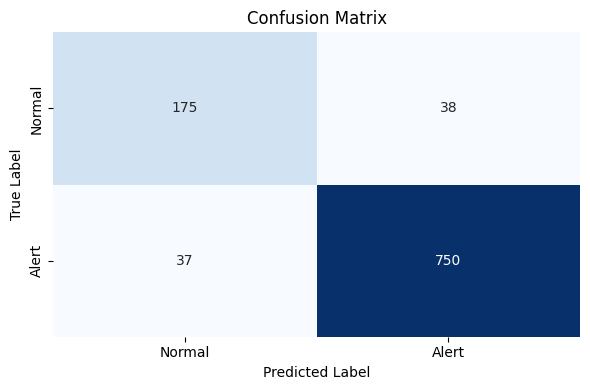

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute and print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



Predicted Alerts for Next 7 Days (Based on 720 daily checks):
--------------------------------------------------------
Day 1:
  • Number of Alerts: 570
  • Alert Rate: 79.17%
  • Normal Operations: 150

Day 2:
  • Number of Alerts: 579
  • Alert Rate: 80.42%
  • Normal Operations: 141

Day 3:
  • Number of Alerts: 553
  • Alert Rate: 76.81%
  • Normal Operations: 167

Day 4:
  • Number of Alerts: 568
  • Alert Rate: 78.89%
  • Normal Operations: 152

Day 5:
  • Number of Alerts: 554
  • Alert Rate: 76.94%
  • Normal Operations: 166

Day 6:
  • Number of Alerts: 574
  • Alert Rate: 79.72%
  • Normal Operations: 146

Day 7:
  • Number of Alerts: 572
  • Alert Rate: 79.44%
  • Normal Operations: 148



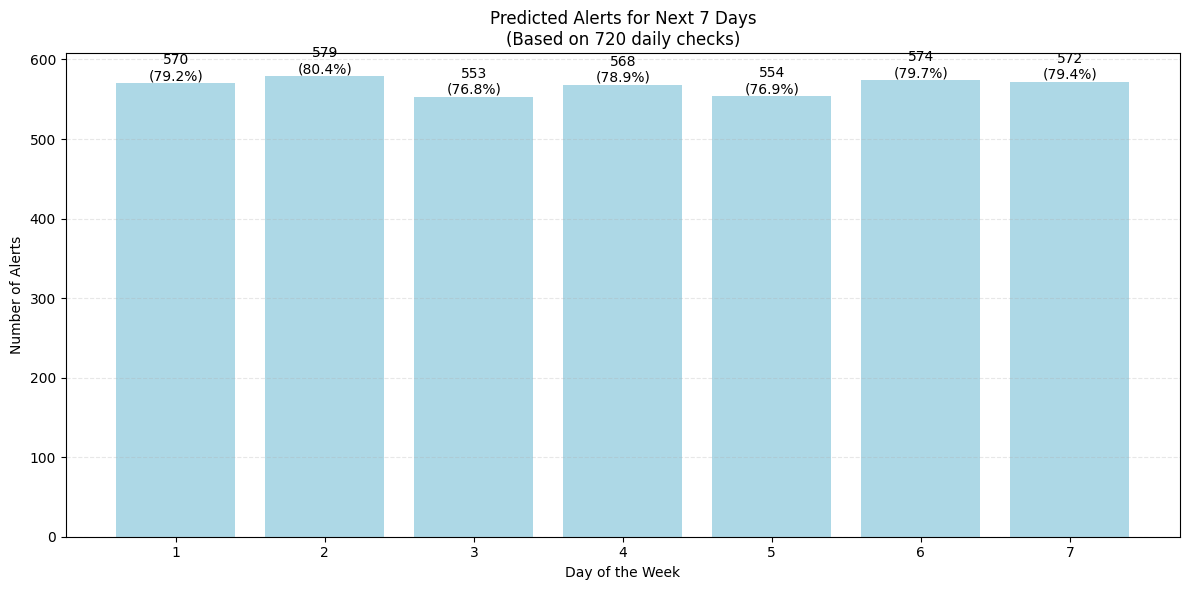


Summary Statistics:
Total predicted alerts over 7 days: 3970
Average daily alerts: 567.1
Average daily alert rate: 78.77%


In [28]:
def predict_next_seven_days(model, current_data, daily_checks=720):  # Set to exactly 720 checks
    daily_alerts = []

    # For each of the next 7 days
    for day in range(7):
        # Create sample data for exactly 720 checks
        next_day_data = current_data.sample(n=daily_checks, replace=True)
        # Update day of week for next day
        next_day_data['day_of_week'] = (next_day_data['day_of_week'] + day) % 7

        # Make predictions for the sampled rows
        predictions = model.predict(next_day_data)
        # Count number of alerts (1s) predicted
        alert_count = np.sum(predictions)
        daily_alerts.append(alert_count)

    return daily_alerts

# Get predictions for next 7 days
future_predictions = predict_next_seven_days(rf_model, X, daily_checks=720)

# Print daily alert predictions with detailed statistics
print("\nPredicted Alerts for Next 7 Days (Based on 720 daily checks):")
print("--------------------------------------------------------")
for day, alert_count in enumerate(future_predictions, 1):
    print(f"Day {day}:")
    print(f"  • Number of Alerts: {alert_count}")
    print(f"  • Alert Rate: {(alert_count/720)*100:.2f}%")
    print(f"  • Normal Operations: {720-alert_count}")
    print()

# Create visualization
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars
bars = ax.bar(range(1, 8), future_predictions, color='lightblue')

# Customize the plot
plt.title('Predicted Alerts for Next 7 Days\n(Based on 720 daily checks)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Alerts')
plt.xticks(range(1, 8))

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({height/720*100:.1f}%)',
            ha='center', va='bottom')

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Display summary statistics
total_alerts = sum(future_predictions)
avg_alerts = total_alerts / 7
print("\nSummary Statistics:")
print(f"Total predicted alerts over 7 days: {total_alerts}")
print(f"Average daily alerts: {avg_alerts:.1f}")
print(f"Average daily alert rate: {(avg_alerts/720)*100:.2f}%")

In [29]:
# Save the model
import pickle
with open('alert_prediction_model2.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
print("\nModel saved as 'alert_prediction_model2.pkl'")


Model saved as 'alert_prediction_model2.pkl'


In [30]:
# Display feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Feature Importance:
            feature  importance
1               pir    0.324343
9   defect_location    0.114049
8       defect_type    0.092001
7        product_id    0.090803
0          entry_id    0.090192
2                ir    0.081244
10             hour    0.054365
3        color code    0.039216
4         part_name    0.034151
5         part_type    0.030273
6          material    0.028020
11      day_of_week    0.021344
12            month    0.000000
